In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
df = pd.read_csv('census-income.csv')

In [37]:
df['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [38]:
# 1 == Answer 15
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [39]:
#2 =934
f=df[df['annual_income']== 1]
f[df['occupation']=='Tech-support']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income


In [40]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [41]:
g =df.groupby('workclass')

In [42]:
k=g.get_group('Private')
f=k[k['native-country']!='United-States']

In [43]:
f[f['native-country']!='?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [44]:
df.rename(columns={'annual_income':'Annual_Income'},inplace=True)

In [45]:
df['Annual_Income'].replace('<=50K',0, inplace=True)

In [46]:
df['Annual_Income'].replace('>50K',1, inplace=True)

In [47]:
df['Annual_Income'].value_counts()

Annual_Income
0    24720
1     7841
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])

In [50]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


<Axes: >

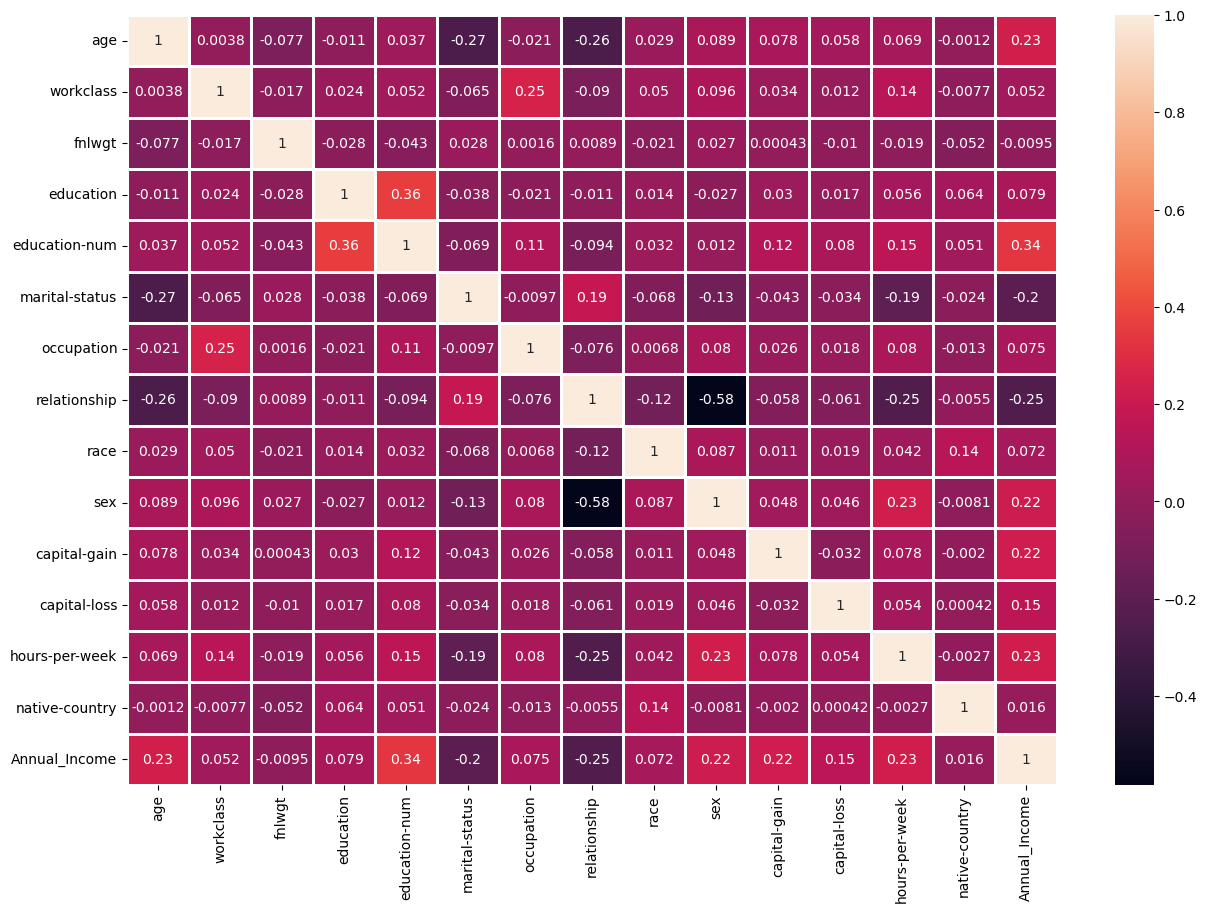

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [52]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
y.value_counts()

Annual_Income
0    24720
1     7841
Name: count, dtype: int64

In [54]:
# !pip install -U imbalanced-learn

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(sampling_strategy=1)

In [57]:
Xnew,ynew=smote.fit_resample(X,y)

In [58]:
ynew.value_counts()

Annual_Income
0    24720
1    24720
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [63]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [65]:
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [66]:
ypred = lr.predict(Xtest)

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [68]:
confusion_matrix(ytest,ypred)

array([[6633, 2073],
       [1858, 6740]], dtype=int64)

In [69]:
accuracy_score(ytest,ypred)

0.7728270920018493

In [70]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      8706
           1       0.76      0.78      0.77      8598

    accuracy                           0.77     17304
   macro avg       0.77      0.77      0.77     17304
weighted avg       0.77      0.77      0.77     17304



In [77]:
print(np.concatenate((ypred.reshape(len(ypred),1),np.reshape(ytest,(len(ytest),1))),1))

[[0 0]
 [0 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
# Logestic Regression given a prediction which is 77% correct and a Average Model,Lets try how other model going to perform

#  Support Vector Classifier Model for Linear Dataset

In [82]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [83]:
sc = StandardScaler()

In [84]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [86]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',random_state=0)

In [87]:
svc_model.fit(Xtrain,ytrain)

SVC(kernel='linear', random_state=0)

In [88]:
ypred = svc_model.predict(Xtest)

In [89]:
confusion_matrix(ytest,ypred)

array([[6356, 2350],
       [1569, 7029]], dtype=int64)

In [90]:
accuracy_score(ytest,ypred)

0.7735205732778548

In [102]:
ypred = ypred.reshape((len(ypred),1))

In [103]:
ytest = np.reshape(ytest,(len(ytest),1))

In [111]:
np.concatenate((ytest,ypred),1)

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 0],
       [1, 1]], dtype=int64)

In [ ]:
# Support Vector Classifier given a prediction which is 77% correct and a Average Model,Lets try how other model going to perform

# Support Vector Classifier Kernal Model for non Linear Dataset

In [112]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [113]:
sc = StandardScaler()

In [114]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [115]:
from sklearn.svm import SVC
kernel_model = SVC(kernel='rbf',random_state=0)


In [116]:
kernel_model.fit(Xtrain,ytrain)

SVC(random_state=0)

In [117]:
ypred = kernel_model.predict(Xtest)

In [118]:
confusion_matrix(ytest,ypred)

array([[7225, 1481],
       [1019, 7579]], dtype=int64)

In [119]:
accuracy_score(ytest,ypred)

0.8555247341655109

In [ ]:
# Support Vector kerel model given a prediction which is 86% correct and a Good Model,Lets try how other model going to perform

# Naive Model for non-Linear Dataset

In [122]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [123]:
sc = StandardScaler()

In [124]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [125]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [126]:
naive_model.fit(Xtrain,ytrain)

GaussianNB()

In [128]:
ypred = naive_model.predict(Xtest)

In [129]:
confusion_matrix(ytest,ypred)

array([[8050,  656],
       [3963, 4635]], dtype=int64)

In [130]:
accuracy_score(ytest,ypred)

0.7330674988441979

In [ ]:
# Naive model given a prediction which is 73% correct and a Average Model,Lets try how other model going to perform

# Knn Model

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [ ]:
sc = StandardScaler()

In [ ]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [134]:
knn_model.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [135]:
ypred = knn_model.predict(Xtest)

In [136]:
confusion_matrix(ytest,ypred)

array([[7306, 1400],
       [1215, 7383]], dtype=int64)

In [137]:
accuracy_score(ytest,ypred)

0.8488788719371244

In [ ]:
# Knn Model given a prediction which is 85% correct and a Average Model,Lets try how other model going to perform

# Decision Tree Classifier

In [138]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [139]:
sc = StandardScaler()

In [140]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,criterion='entropy')

In [142]:
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [144]:
ypred = dt.predict(Xtest)

In [145]:
confusion_matrix(ytest,ypred)

array([[7431, 1275],
       [1148, 7450]], dtype=int64)

In [146]:
accuracy_score(ytest,ypred)

0.8599745723532132

In [ ]:
# Decision Tree 86% accurately

In [ ]:
## Random Forest Classifier Model

In [148]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.35,random_state=0)

In [149]:
sc = StandardScaler()

In [150]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy')

In [152]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [154]:
ypred = rf.predict(Xtest)

In [155]:
confusion_matrix(ytest,ypred)

array([[7815,  891],
       [ 919, 7679]], dtype=int64)

In [156]:
accuracy_score(ytest,ypred)

0.8953999075358299

In [ ]:
# Random Forest Classifier Predicting 90% Accurate result and Best among all the other models